In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tszip
import sc2ts

In [2]:
data_dir = Path("../arg_postprocessing")

In [ ]:
df_3seq = pd.read_csv(data_dir / "ripples_3seq_p4.csv")
assert df_3seq.p.min() <= 0.05

In [3]:
df_rip_p4 = pd.read_csv(data_dir / "sc2ts_viridian_v1.2_ripples_p4.csv")
df_rip_p3 = pd.read_csv(data_dir / "sc2ts_viridian_v1.2_ripples_p3.csv")

In [4]:
df_rip_p4.columns

Index(['usher_node', 'pango_counts', 'sc2ts_mrca', 'sc2ts_num_descendants',
       'sc2ts_closest_recombinant', 'sc2ts_closest_recombinant_path_len',
       'usher_num_descendants'],
      dtype='object')

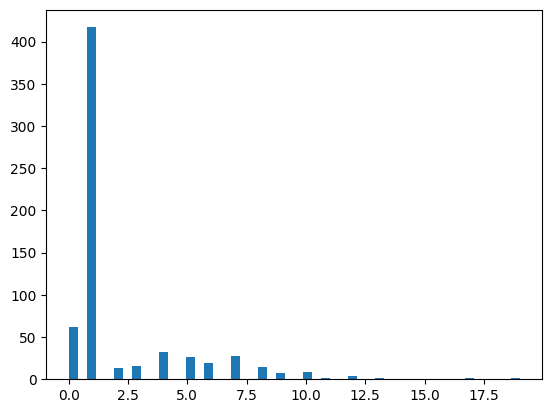

In [ ]:
plt.hist(df_rip_p4[df_rip_p4.sc2ts_closest_recombinant != -1].sc2ts_closest_recombinant_path_len, bins=50);

In [7]:
# How do we define a RIPPLES event that is also detected by sc2ts?
# RIPPLES p=4
df_rip_recomb_p4 = df_rip_p4[
    (df_rip_p4.sc2ts_closest_recombinant != -1) & \
    (df_rip_p4.sc2ts_closest_recombinant_path_len < 3) & \
    (~df_rip_p4.usher_node.str.startswith("node_"))
]
df_rip_nonrecomb_p4 = df_rip_p4[
    (df_rip_p4.sc2ts_closest_recombinant == -1) & \
    (~df_rip_p4.usher_node.str.startswith("node_"))
]
# RIPPLES p=3
df_rip_recomb_p3 = df_rip_p3[
    (df_rip_p3.sc2ts_closest_recombinant != -1) & \
    (df_rip_p3.sc2ts_closest_recombinant_path_len < 3) & \
    (~df_rip_p3.usher_node.str.startswith("node_"))
]
df_rip_nonrecomb_p3 = df_rip_p3[
    (df_rip_p3.sc2ts_closest_recombinant == -1) & \
    (~df_rip_p3.usher_node.str.startswith("node_"))
]

In [8]:
ts = tszip.decompress("../data/sc2ts_viridian_v1.2.trees.tsz")
nodes_df = sc2ts.node_data(ts)
nodes_df.head(1)

,pango,sample_id,scorpio,node_id,is_sample,is_recombinant,num_mutations,max_descendant_samples,date
0,B,Vestigial_ignore,.,0,False,False,0,0,2019-11-23


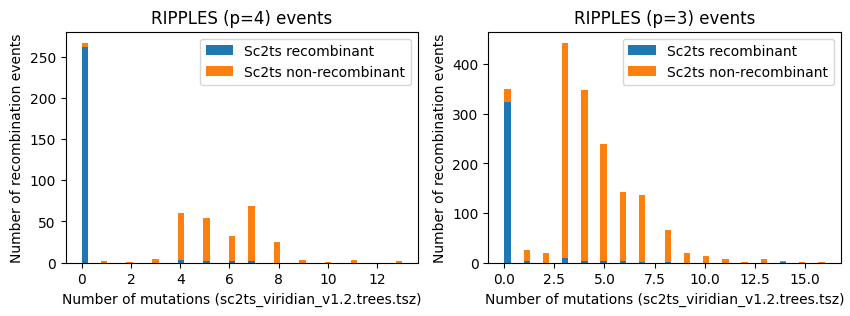

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].set_title("RIPPLES (p=4) events")
ax[0].set_ylabel("Number of recombination events")
ax[0].set_xlabel("Number of mutations (sc2ts_viridian_v1.2.trees.tsz)")
ax[0].hist(
    [
        nodes_df[nodes_df.sample_id.isin(df_rip_recomb_p4.usher_node)].num_mutations,
        nodes_df[nodes_df.sample_id.isin(df_rip_nonrecomb_p4.usher_node)].num_mutations,
    ],
    bins=50,
    stacked=True,
    label=["Sc2ts recombinant", "Sc2ts non-recombinant"],
)
ax[0].legend()

ax[1].set_title("RIPPLES (p=3) events")
ax[1].set_ylabel("Number of recombination events")
ax[1].set_xlabel("Number of mutations (sc2ts_viridian_v1.2.trees.tsz)")
ax[1].hist(
    [
        nodes_df[nodes_df.sample_id.isin(df_rip_recomb_p3.usher_node)].num_mutations,
        nodes_df[nodes_df.sample_id.isin(df_rip_nonrecomb_p3.usher_node)].num_mutations,
    ],
    bins=50,
    stacked=True,
    label=["Sc2ts recombinant", "Sc2ts non-recombinant"],
)
ax[1].legend();

In [10]:
sc2ts_df = pd.read_csv("../data/recombinants.csv")
sc2ts_df.head(5)

,recombinant,sample_id,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,...,parent_pangonet_distance,net_min_supporting_loci_lft,net_min_supporting_loci_rgt,net_min_supporting_loci_lft_rgt_ge_4,k1000_muts,event_label,ripples_p4,ripples_p3,is_ripples_p4_recombinant,is_ripples_p3_recombinant
0,1280342,ERR9939974,1,1,1,695,958,1,COVID-ARTIC-V4.1,.,...,5,2,16,False,8,novel,False,False,False,False
1,663484,SRR20259474,1,1,1,510,1222,1,COVID-AMPLISEQ-V1,.,...,2,2,16,False,5,novel,False,True,False,True
2,1356368,ERR10219711,2,1,1,695,1453,1,COVID-ARTIC-V4.1,.,...,4,1,16,False,5,novel,False,False,False,False
3,1253364,ERR9848224,855,1,1,695,1627,1,COVID-ARTIC-V4.1,.,...,4,1,54,False,7,novel,False,False,False,False
4,1279026,ERR9940192,662,1,1,695,1627,0,COVID-ARTIC-V4.1,.,...,3,2,8,False,6,novel,False,False,False,False


In [11]:
usher_ts = tszip.decompress("../data/usher_viridian_inter_v1.2.trees.tsz")
usher_df = sc2ts.node_data(usher_ts)
usher_df.head(1)

,Date_tree,sample_id,node_id,is_sample,is_recombinant,num_mutations,max_descendant_samples
0,2020-01-19,SRR11772659,0,True,False,0,1


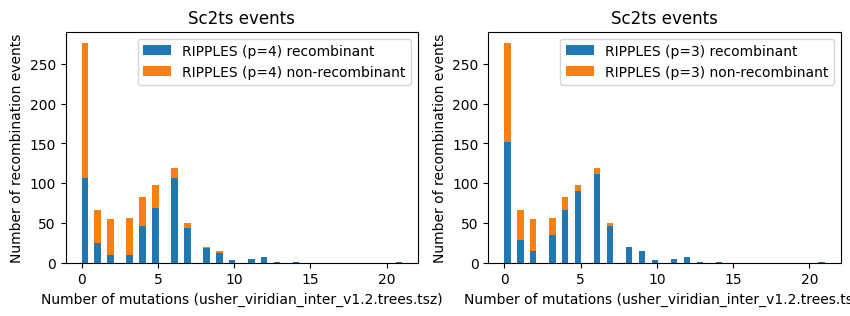

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].set_title("Sc2ts events")
ax[0].set_ylabel("Number of recombination events")
ax[0].set_xlabel("Number of mutations (usher_viridian_inter_v1.2.trees.tsz)")
ax[0].hist(
    [
        usher_df[
            usher_df.sample_id.isin(sc2ts_df[sc2ts_df.is_ripples_p4_recombinant].sample_id)
        ].num_mutations,
        usher_df[
            usher_df.sample_id.isin(sc2ts_df[~sc2ts_df.is_ripples_p4_recombinant].sample_id)
        ].num_mutations,
    ],
    bins=50,
    stacked=True,
    label=["RIPPLES (p=4) recombinant", "RIPPLES (p=4) non-recombinant"],
)
ax[0].legend()

ax[1].set_title("Sc2ts events")
ax[1].set_ylabel("Number of recombination events")
ax[1].set_xlabel("Number of mutations (usher_viridian_inter_v1.2.trees.tsz)")
ax[1].hist(
    [
        usher_df[
            usher_df.sample_id.isin(sc2ts_df[sc2ts_df.is_ripples_p3_recombinant].sample_id)
        ].num_mutations,
        usher_df[
            usher_df.sample_id.isin(sc2ts_df[~sc2ts_df.is_ripples_p3_recombinant].sample_id)
        ].num_mutations,
    ],
    bins=50,
    stacked=True,
    label=["RIPPLES (p=3) recombinant", "RIPPLES (p=3) non-recombinant"],
)
ax[1].legend();